# FEEMS Demonstration

First load the necessary python packages and json data for components and configuration

In [51]:
import json
import numpy as np
import pandas as pd
from feems.components_model import Engine, ElectricMachine, Genset
from feems.components_model.component_electric import SerialSystemElectric, ElectricComponent
from feems.system_model import ElectricPowerSystem
from feems.types_for_feems import TypePower, TypeComponent
from utils import get_type_component, get_component_configuration_data, \
    get_component_data_from_name, get_configured_component_from_name, \
    create_components_for_an_electric_system
import matplotlib.pyplot as plt

In [52]:
component_data, configuration_data = get_component_configuration_data()
print("******* Component data *******")
component_data

******* Component data *******


[{'type': 'AUXILIARY_ENGINE',
  'name': 'Auxiliary engine 700',
  'rated_power': 700,
  'rated_speed': 1500,
  'bsfc_curve': [[0.25, 0.5, 0.75, 1.0], [280.0, 220.0, 200.0, 210.0]]},
 {'type': 'AUXILIARY_ENGINE',
  'name': 'Auxiliary engine 1000',
  'rated_power': 1000,
  'rated_speed': 1500,
  'bsfc_curve': [[0.25, 0.5, 0.75, 0.1], [250.0, 200.0, 180.0, 195.0]]},
 {'type': 'GENERATOR',
  'name': 'Generator A',
  'rated_power': 665,
  'rated_speed': 1500,
  'eff_curve': [[1.0, 0.75, 0.5, 0.25], [0.95, 0.94, 0.92, 0.88]]},
 {'type': 'GENERATOR',
  'name': 'Generator B',
  'rated_power': 950,
  'rated_speed': 1500,
  'eff_curve': [[1.0, 0.75, 0.5, 0.25], [0.95, 0.94, 0.92, 0.88]]},
 {'type': 'ELECTRIC_MOTOR',
  'name': 'Electric Motor A',
  'rated_power': 800,
  'rated_speed': 1200,
  'eff_curve': [[1.0, 0.75, 0.5, 0.25], [0.95, 0.96, 0.91, 0.86]]},
 {'type': 'ELECTRIC_MOTOR',
  'name': 'Electric Motor B',
  'rated_power': 600,
  'rated_speed': 1200,
  'eff_curve': [[1.0, 0.75, 0.5, 0.25]

In [53]:
print("******* Configuration data *******")
configuration_data

******* Configuration data *******


[{'name': 'Aux engine 1',
  'component': 'Auxiliary engine 700',
  'switchboard_id': 1,
  'shaftline_id': None,
  'connected_to': 'Generator 1'},
 {'name': 'Aux engine 2',
  'component': 'Auxiliary engine 1000',
  'switchboard_id': 2,
  'shaftline_id': None,
  'connected_to': 'Generator 2'},
 {'name': 'Generator 1',
  'component': 'Generator A',
  'switchboard_id': 1,
  'shaftline_id': None,
  'connected_to': 'switchboard'},
 {'name': 'Generator 2',
  'component': 'Generator B',
  'switchboard_id': 2,
  'shaftline_id': None,
  'connected_to': 'switchboard'},
 {'name': 'Thruster motor 1',
  'component': 'Electric Motor A',
  'switchboard_id': 1,
  'shaftline_id': None,
  'connected_to': 'Inverter 1'},
 {'name': 'Thruster motor 2',
  'component': 'Electric Motor B',
  'switchboard_id': 2,
  'shaftline_id': None,
  'connected_to': 'Inverter 2'},
 {'name': 'Inverter 1',
  'component': 'Inverter',
  'switchboard_id': 1,
  'shaftline_id': None,
  'connected_to': 'Rectifier 1'},
 {'name': 'In

## Example 1: Create an atomic component

In [54]:
engine_component = get_configured_component_from_name('Aux engine 1', configuration_data)
engine_component_data = get_component_data_from_name(engine_component['component'], component_data)
aux_engine_1 = Engine(
    type_=get_type_component(engine_component_data['type']),
    name=engine_component['name'],
    rated_power=engine_component_data['rated_power'],
    rated_speed=engine_component_data['rated_speed'],
    bsfc_curve=np.asarray(engine_component_data['bsfc_curve']).transpose()
)
aux_engine_1

### Calculate the fuel consumption for a given power load

In [55]:
power_output = 450.0

fuel_consumption, perc_load, bsfc = \
    aux_engine_1.get_fuel_cons_load_bsfc_from_power_out_kw(power_output)

columns = ["Power [kW]", "Fuel consumption [kg/s]", "Load [%]", "BSFC [g/kWh]"]
columns_to_print = [column + '\t' for column in columns]

print(''.join(columns_to_print))
print("%3.2f\t\t%5.5f\t\t\t%3.1f\t\t%3.1f" % (power_output, fuel_consumption, perc_load * 100, bsfc))

Power [kW]	Fuel consumption [kg/s]	Load [%]	BSFC [g/kWh]	
450.00		0.02559			64.3		204.7


### Calculate the fuel consumptions by setting the power outputs

In [56]:
power_output = np.arange(start=0, stop=710, step=50)
aux_engine_1.power_output = power_output

fuel_consumption, perc_load, bsfc = \
    aux_engine_1.get_fuel_cons_load_bsfc_from_power_out_kw()

data = np.array([fuel_consumption, perc_load * 100, bsfc]).transpose()
df = pd.DataFrame(data, index=power_output, columns=columns[1:])
print(df)

     Fuel consumption [kg/s]    Load [%]  BSFC [g/kWh]
0                   0.000000    0.000000    360.000000
50                  0.004703    7.142857    338.600583
100                 0.008759   14.285714    315.335277
150                 0.012150   21.428571    291.603499
200                 0.014934   28.571429    268.804665
250                 0.017246   35.714286    248.338192
300                 0.019300   42.857143    231.603499
350                 0.021389   50.000000    220.000000
400                 0.023518   57.142857    211.661808
450                 0.025590   64.285714    204.723032
500                 0.027859   71.428571    200.583090
550                 0.030573   78.571429    200.116618
600                 0.033552   85.714286    201.311953
650                 0.036901   92.857143    204.373178
700                 0.040833  100.000000    210.000000


Plot the fuel consumption curve

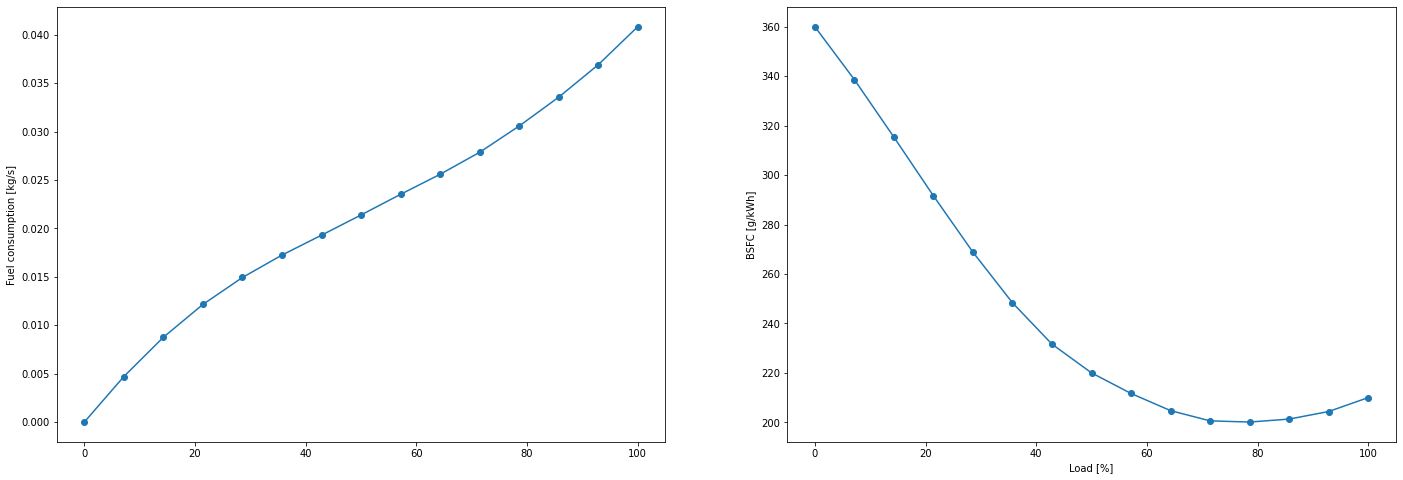

In [57]:
plt.figure(figsize=[24, 8])
plt.subplot(1,2,1)
plt.plot(df[columns[2]], df[columns[1]], 'o-')
plt.ylabel(columns[1])
plt.subplot(1,2,2)
plt.plot(df[columns[2]], df[columns[3]], 'o-')
plt.ylabel(columns[3])
plt.xlabel(columns[2])

plt.show()

## Example 2: Create a serial component
We are going to create a generator 1 component and make a serial component together with the
auxiliary engine created before. First, we create a generator component.

In [58]:
generator_component = get_configured_component_from_name('Generator 1', configuration_data)
generator_data = get_component_data_from_name(generator_component['component'], component_data)

generator_1 = ElectricMachine(
    type_=generator_data['type'],
    name=generator_component['name'],
    rated_power=generator_data['rated_power'],
    rated_speed=generator_data['rated_speed'],
    power_type=TypePower.POWER_SOURCE,
    switchboard_id=generator_component['switchboard_id'],
    eff_curve=np.asarray(generator_data['eff_curve']).transpose()
)
generator_1

Now, we can create a genset component as a serial component.

In [59]:
genset_1 = Genset(
    name="Genset 1",
    aux_engine=aux_engine_1,
    generator=generator_1
)
genset_1

We will calculate the fuel consumption of the genset from the power output of the genset in two ways.
First, we do the calculation using the separate components. Then we compare the result with the calculation
using the genset component.

First, we generate a random power series.

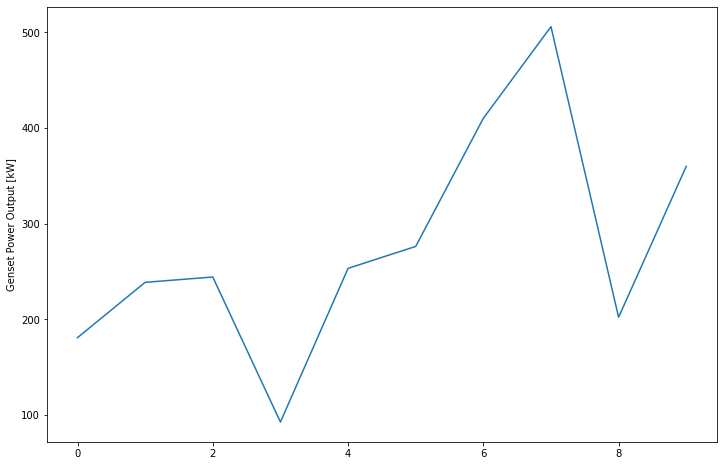

In [60]:
power_output = genset_1.rated_power * np.random.random(10)
plt.figure(figsize=[12, 8])
plt.plot(power_output)
plt.ylabel('Genset Power Output [kW]')

plt.show()

### Fuel calculation using the components separately
First we calculate the shaft power (power input) of the generator from the power output

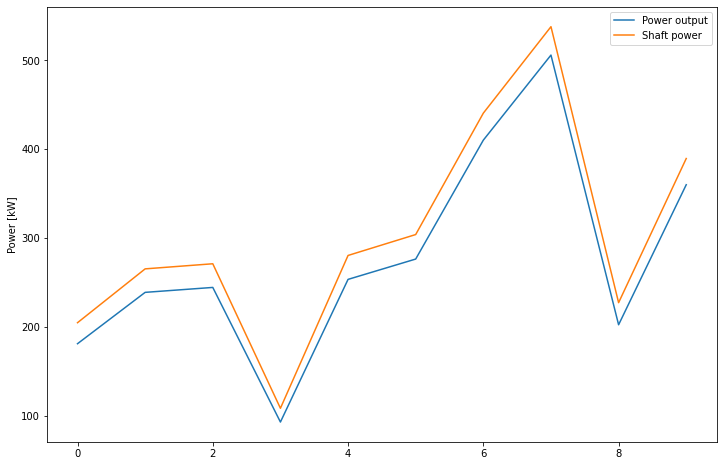

In [61]:
generator_1.set_power_input_from_output(power_output)
plt.figure(figsize=[12, 8])
plt.plot(power_output)
plt.plot(generator_1.power_input)
plt.ylabel('Power [kW]')
plt.legend(['Power output', 'Shaft power'])

plt.show()

Now we can calculate the fuel consumption for the shaft power

In [62]:
aux_engine_1.power_output = generator_1.power_input
fuel_consumption_ref, perc_load_ref, bsfc_ref = aux_engine_1.get_fuel_cons_load_bsfc_from_power_out_kw()

data = np.array([fuel_consumption_ref, perc_load_ref * 100, bsfc_ref]).transpose()
df_ref = pd.DataFrame(data, index=power_output, columns=columns[1:])
print(df_ref)

            Fuel consumption [kg/s]   Load [%]  BSFC [g/kWh]
180.895351                 0.015161  29.221660    266.823999
238.711255                 0.017884  37.880137    242.805473
244.260141                 0.018121  38.700524    240.807447
92.717726                  0.009361  15.457888    311.435538
253.324951                 0.018503  40.037694    237.673820
276.210063                 0.019454  43.399720    230.524392
410.092963                 0.025190  62.927068    205.870066
505.856402                 0.029883  76.831548    200.028803
202.234813                 0.016234  32.444081    257.329575
359.888770                 0.023078  55.628652    213.359746


### Fuel calculation using the serial component
The two-step calculation can be done at once with the serial component

In [63]:
fuel_consumption, perc_load_eng, bsfc, perc_load_gen = \
    genset_1.get_fuel_cons_load_bsfc_from_power_out_generator_kw(power_output)

data = np.array([fuel_consumption, perc_load_eng * 100, bsfc]).transpose()
df = pd.DataFrame(data, index=power_output, columns=columns[1:])
print(df)

            Fuel consumption [kg/s]   Load [%]  BSFC [g/kWh]
180.895351                 0.015161  29.221660    266.823999
238.711255                 0.017884  37.880137    242.805473
244.260141                 0.018121  38.700524    240.807447
92.717726                  0.009361  15.457888    311.435538
253.324951                 0.018503  40.037694    237.673820
276.210063                 0.019454  43.399720    230.524392
410.092963                 0.025190  62.927068    205.870066
505.856402                 0.029883  76.831548    200.028803
202.234813                 0.016234  32.444081    257.329575
359.888770                 0.023078  55.628652    213.359746


### Creating electric serial component
An electric serial component can consist of multiple component. First, we will create the components in a
propulsion drive, namely, a transformer, a rectifier, an inverter, and an electric motor. Then, the efficiency curve for each component will be shown below.

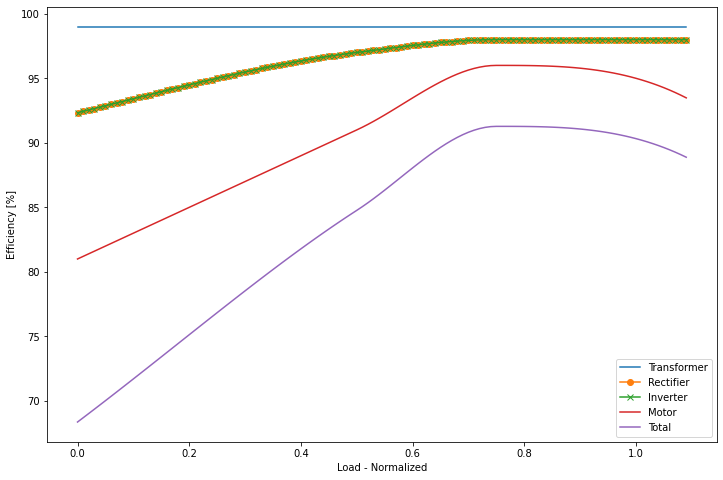

In [77]:
transformer_component = get_configured_component_from_name('Transformer 1', configuration_data)
transformer_component_data = get_component_data_from_name(transformer_component['component'], component_data)
transformer_1 = ElectricComponent(
    type_=get_type_component(transformer_component_data['type']),
    name=transformer_component['name'],
    rated_power=transformer_component_data['rated_power'],
    eff_curve=np.asarray(transformer_component_data['eff_curve']).transpose(),
    power_type=TypePower.POWER_TRANSMISSION,
    switchboard_id=transformer_component['switchboard_id'],
)

rectifier_component = get_configured_component_from_name('Rectifier 1', configuration_data)
rectifier_component_data = get_component_data_from_name(rectifier_component['component'], component_data)
rectifier_1 = ElectricComponent(
    type_=get_type_component(rectifier_component_data['type']),
    name=rectifier_component['name'],
    rated_power=rectifier_component_data['rated_power'],
    eff_curve=np.asarray(rectifier_component_data['eff_curve']).transpose(),
    power_type=TypePower.POWER_TRANSMISSION,
    switchboard_id=rectifier_component['switchboard_id'],
)

inverter_component = get_configured_component_from_name('Inverter 1', configuration_data)
inverter_component_data = get_component_data_from_name(inverter_component['component'], component_data)
inverter_1 = ElectricComponent(
    type_=get_type_component(inverter_component_data['type']),
    name=inverter_component['name'],
    rated_power=inverter_component_data['rated_power'],
    eff_curve=np.asarray(inverter_component_data['eff_curve']).transpose(),
    power_type=TypePower.POWER_TRANSMISSION,
    switchboard_id=inverter_component['switchboard_id'],
)

electric_motor_component = get_configured_component_from_name('Thruster motor 1', configuration_data)
electric_motor_component_data = get_component_data_from_name(electric_motor_component['component'], component_data)
thruster_motor_1 = ElectricMachine(
    type_=get_type_component(electric_motor_component_data['type']),
    name=electric_motor_component['name'],
    rated_power=electric_motor_component_data['rated_power'],
    rated_speed=electric_motor_component_data['rated_speed'],
    eff_curve=np.asarray(electric_motor_component_data['eff_curve']).transpose(),
    power_type=TypePower.POWER_CONSUMER,
    switchboard_id=electric_motor_component['switchboard_id'],
)

plt.figure(figsize=[12, 8])
load = np.arange(start=0.0, stop=1.1, step=0.01)
eff_transformer_1 = transformer_1.get_efficiency_from_load_percentage(load)
eff_rectifier_1 = rectifier_1.get_efficiency_from_load_percentage(load)
eff_inverter_1 = inverter_1.get_efficiency_from_load_percentage(load)
eff_thruster_motor_1 = thruster_motor_1.get_efficiency_from_load_percentage(load)
total_efficiency = eff_thruster_motor_1 * eff_rectifier_1 * eff_inverter_1 * eff_transformer_1
plt.plot(load, eff_transformer_1 * 100)
plt.plot(load, eff_rectifier_1 * 100, '-o')
plt.plot(load, eff_inverter_1 * 100, '-x')
plt.plot(load, eff_thruster_motor_1 * 100)
plt.plot(load, total_efficiency * 100)
plt.ylabel('Efficiency [%]')
plt.xlabel('Load - Normalized')
plt.legend(['Transformer', 'Rectifier', 'Inverter', 'Motor', 'Total'])

Now we can create a propulsion drive containing the four components

In [65]:
propulsion_drive_1 = SerialSystemElectric(
    type_=TypeComponent.PROPULSION_DRIVE,
    name="Propulsion drive 1",
    power_type=TypePower.POWER_CONSUMER,
    components=[transformer_1, rectifier_1, inverter_1, thruster_motor_1],
    rated_power=thruster_motor_1.rated_power,
    rated_speed=thruster_motor_1.rated_speed,
    switchboard_id=transformer_1.switchboard_id
)

Now we can calculate the power at the switchboard terminal (power_input) from the shaft power
of the motor (power_output)

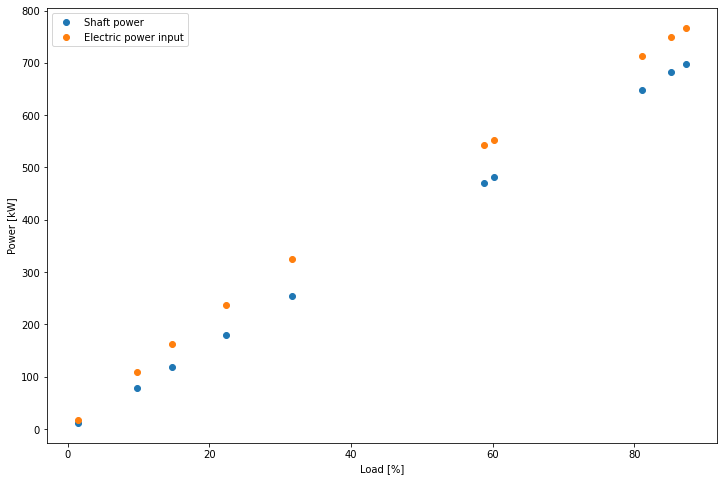

           Shaft power[kW]  El power [kW]  Efficiency [%]
1.412291         16.425176      11.298328       68.786645
9.744259        109.336117      77.954068       71.297637
14.700854       161.516527     117.606835       72.814119
22.353641       237.833120     178.829130       75.191012
31.743971       325.121919     253.951766       78.109703
58.766823       543.070965     470.134587       86.569642
60.204640       553.462100     481.637120       87.022602
81.020058       713.445594     648.160465       90.849319
85.211335       748.972731     681.690680       91.016756
87.322364       767.303769     698.578913       91.043331


In [66]:
power_output = propulsion_drive_1.rated_power * np.random.random(10)
power_input, load = propulsion_drive_1.set_power_input_from_output(power_output)
plt.figure(figsize=[12, 8])
plt.scatter(load*100, power_output)
plt.scatter(load*100, power_input)
plt.xlabel('Load [%]')
plt.ylabel('Power [kW]')
plt.legend(['Shaft power', 'Electric power input'])
plt.show()

data = np.array([power_input, power_output, power_output/power_input * 100]).transpose()
df = pd.DataFrame(data, index=load*100, columns=['Shaft power[kW]', 'El power [kW]', 'Efficiency [%]'])
df = df.sort_index()
print(df)

# Example 3: Create a system and perform power balance and fuel calculation
We will create components or serial components that are directly connected to the switchboard.

In [67]:
components = create_components_for_an_electric_system()
for component in components:
    print(component.name)

Genset 1
Genset 2
Propulsion drive 1
Propulsion drive 2
Aux load


Now we can create an electric power system model.

In [68]:
electric_power_system = ElectricPowerSystem(
    name='Power system',
    power_plant_components=components,
    bus_tie_connections=[(1,2)]
)
electric_power_system.__dict__

{'name': 'Power system',
 'power_sources': [<feems.components_model.component_electric.Genset at 0x137b9a588>,
 'propulsion_drives': [<feems.components_model.component_electric.SerialSystemElectric at 0x137b4b080>,
 'pti_pto': [],
 'energy_storage': [],
 'other_load': [<feems.components_model.component_electric.ElectricComponent at 0x137b4b5f8>],
 'switchboards': {1: <feems.components_model.node.Switchboard at 0x137d03240>,
  2: <feems.components_model.node.Switchboard at 0x137d03828>},
 'bus_tie_breakers': [<feems.components_model.node.BusBreaker at 0x137d03a58>],
 'no_bus': [],
 'switchboard2bus': [],
 'bus_tie_status_system': [],
 'bus_configuration_change_index': [0],
 'switchboard_id': [1, 2],
 'no_bus_tie_breakers': 1,
 'no_power_sources': 2,
 'no_propulsion_units': 2,
 'no_energy_storage': 0,
 'no_pti_pto': 0,
 'no_other_load': 1,
 'no_switchboard': 2}

We can set power random power loads on the propulsion drives.

In [69]:
number_points_load = 100
shaft_power_on_propulsion_drive_1 = \
    electric_power_system.propulsion_drives[0].rated_power * np.random.random(number_points_load)
shaft_power_on_propulsion_drive_2 = \
    electric_power_system.propulsion_drives[1].rated_power * np.random.random(number_points_load)
electric_power_system.set_power_input_from_power_output_by_switchboard_id_type_name(
    power_output=shaft_power_on_propulsion_drive_1,
    switchboard_id=1,
    type_=TypePower.POWER_CONSUMER,
    name="Propulsion drive 1"
),
electric_power_system.set_power_input_from_power_output_by_switchboard_id_type_name(
    power_output=shaft_power_on_propulsion_drive_2,
    switchboard_id=2,
    type_=TypePower.POWER_CONSUMER,
    name="Propulsion drive 2"
)
electric_power_system

Set a power load on the auxiliary load

In [70]:
auxiliary_load = 100 * np.random.random(number_points_load)
electric_power_system.set_power_input_from_power_output_by_switchboard_id_type_name(
    power_output=auxiliary_load,
    switchboard_id=1,
    type_=TypePower.POWER_CONSUMER,
    name="Aux load"
)

Now we need to set the status of the generators (on/off) and their load sharing mode.

In [71]:
electric_power_system.set_status_by_switchboard_id_power_type(
    switchboard_id=1,
    power_type=TypePower.POWER_SOURCE,
    status = np.ones([number_points_load, 1]).astype(bool) # <== No. 1 genset is on for all periods
)
electric_power_system.set_load_sharing_mode_power_sources_by_switchboard_id_power_type(
    switchboard_id=1,
    power_type=TypePower.POWER_SOURCE,
    load_sharing_mode=np.zeros([number_points_load, 1])  # <== Equal load sharing
)
electric_power_system.set_status_by_switchboard_id_power_type(
    switchboard_id=2,
    power_type=TypePower.POWER_SOURCE,
    status = np.ones([number_points_load, 1]).astype(bool) # <== No. 2 genset is on for all periods
)
electric_power_system.set_load_sharing_mode_power_sources_by_switchboard_id_power_type(
    switchboard_id=2,
    power_type=TypePower.POWER_SOURCE,
    load_sharing_mode=np.zeros([number_points_load, 1])  # <== Equal load sharing
)

Finally, bus-tie breaker status should be specified

In [72]:
status = np.ones([number_points_load, 1]).astype(bool)
status[int(number_points_load/2):,0] = False
electric_power_system.set_bus_tie_status_all(status)

Now we can do the power balance calculation which gives the power ouput of the gensets

In [73]:
electric_power_system.do_power_balance_calculation()

We will plot the power balance between the power consumers and sources

/Users/keviny/Dev/feems-for-km/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/keviny/Dev/feems-for-km/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


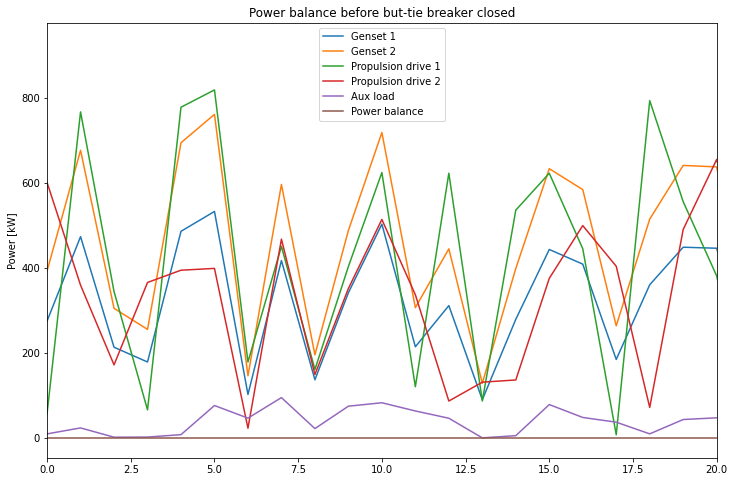

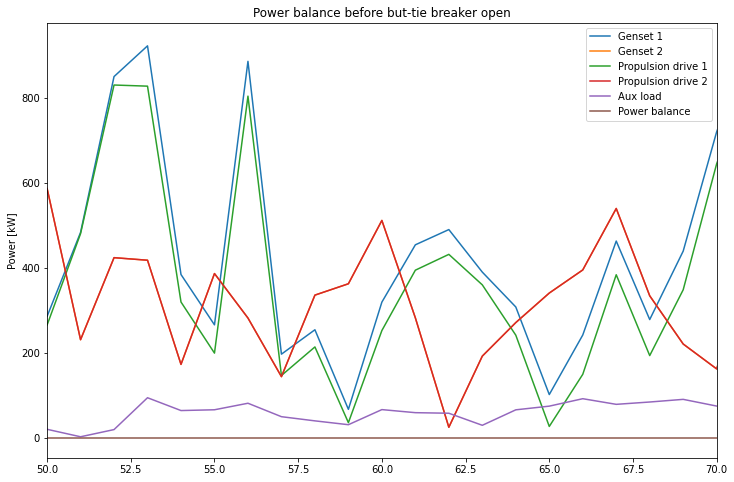

In [74]:
genset_1 = electric_power_system.power_sources[0]
genset_2 = electric_power_system.power_sources[1]
propulsion_drive_1 = electric_power_system.propulsion_drives[0]
propulsion_drive_2 = electric_power_system.propulsion_drives[1]
aux_load = electric_power_system.other_load[0]
power_balance = genset_1.power_output + genset_2.power_output - \
                propulsion_drive_1.power_input - propulsion_drive_2.power_input - aux_load.power_input

fig = plt.figure(figsize=[12, 8])
plt.plot(genset_1.power_output)
plt.plot(genset_2.power_output)
plt.plot(propulsion_drive_1.power_input)
plt.plot(propulsion_drive_2.power_input)
plt.plot(aux_load.power_input)
plt.plot(power_balance)
plt.ylabel('Power [kW]')
plt.xlim([0,20])
plt.title("Power balance before but-tie breaker closed")
plt.legend(['Genset 1', 'Genset 2', 'Propulsion drive 1', 'Propulsion drive 2', 'Aux load', 'Power balance'])
fig.show()

fig = plt.figure(figsize=[12, 8])
plt.plot(genset_1.power_output)
plt.plot(genset_2.power_output)
plt.plot(propulsion_drive_1.power_input)
plt.plot(propulsion_drive_2.power_input)
plt.plot(aux_load.power_input)
plt.plot(power_balance)
plt.ylabel('Power [kW]')
plt.xlim([50,70])
plt.title("Power balance before but-tie breaker open")
plt.legend(['Genset 1', 'Genset 2', 'Propulsion drive 1', 'Propulsion drive 2', 'Aux load', 'Power balance'])
fig.show()

Finally, we can calculate the fuel consumption and other KPIs

In [75]:
result = electric_power_system.get_fuel_energy_consumption_running_time(time_interval_s = 1)
print(result.detail_result)


          fuel consumption [kg] electric energy consumption [MJ]  \
Genset 1               2.760248                                0   
Genset 2               2.370980                                0   

         mechanical energy consumption [MJ]  running hours [h]  \
Genset 1                                  0           0.027778   
Genset 2                                  0           0.027778   

          CO2 emission [kg]  NOx emission [kg] component type rated capacity  \
Genset 1           8.595412           0.091512         GENSET            665   
Genset 2           7.383231           0.087881         GENSET            950   

         rated capacity unit  switchboard id  
Genset 1                  kW               1  
Genset 2                  kW               2  
